In [1]:
import numpy as np
from copy import deepcopy
import itertools
import matplotlib
from numpy import radians as rad
from matplotlib.animation import FuncAnimation
from scipy.ndimage import convolve,convolve1d
import cmasher
import seaborn as sns
from collections import defaultdict
from manim import *
import networkx as nx
from scipy.interpolate import interp1d
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import random
from networkx.drawing.nx_pydot import graphviz_layout
from scipy.special import softmax
import itertools as it
from collections import deque
import torch.nn.functional as F

# Casino

In [80]:
from manim import *
import numpy as np

def expected_log_winnings(c1, c2, p1, p2, q1, q2):
    return p1 * np.log(c1 / q1) + p2 * np.log(c2 / q2)


class Casino(Scene):
    def construct(self):
        hearts = ImageMobject("images/hearts.png")
        spades = ImageMobject("images/spades.png")
        
        # Set initial positions for the images off the edges of the screen
        hearts.move_to(LEFT * 7)  # Move hearts off-screen to the left
        spades.move_to(RIGHT * 7)  # Move spades off-screen to the right

        # Animate the images flying to their final positions symmetrically around the center
        self.play(
            hearts.animate.move_to(LEFT * 2),  # Move hearts to final position
            spades.animate.move_to(RIGHT * 2)  # Move spades to final position
        )

        # Keep the images on the screen
        self.wait(1)

        # Add text under the images
        text_p1 = MathTex(r"p_1 = 0.2").next_to(hearts, DOWN)
        text_p2 = MathTex(r"p_2 = 0.8").next_to(spades, DOWN)

        # Animate the text appearing
        self.play(Write(text_p1))
        self.play(Write(text_p2))

        # Keep the images and text on the screen
        self.wait(1)

        # Animate everything moving upward
        self.play(
            hearts.animate.shift(UP * 2),
            spades.animate.shift(UP * 2),
            text_p1.animate.shift(UP * 2),
            text_p2.animate.shift(UP * 2)
        )

        # Keep the images and text on the screen
        self.wait(1)

        # Add new text under the existing text
        new_text_p1 = MathTex(r"\frac{\$6}{p_1}").next_to(text_p1, DOWN * 3)
        new_text_p2 = MathTex(r"\frac{\$4}{p_2}").next_to(text_p2, DOWN * 3)

        # Animate the new text appearing
        self.play(Write(new_text_p1), Write(new_text_p2))

        # Keep the new text on the screen
        self.wait(1)

        # Update the equation to replace "your bet on red" and "your bet on black" with $6 and $4
        updated_eq = MathTex(
            r"E(winnings) =",
            r"p_1",
            r"\frac{\$6}{p_1}",
            r"+",
            r"p_2",
            r"\frac{\$4}{p_2}",
            r" = \$10"
        ).move_to(DOWN)
        
        self.play(
            TransformMatchingTex(new_text_p1, updated_eq),
            TransformMatchingTex(new_text_p2, updated_eq),        )

        money1 = updated_eq[2][:2]
        money2 = updated_eq[5][:2]
        money3 = updated_eq[6][-3:]

        self.play(
            money1.animate.set_color(YELLOW),
            money2.animate.set_color(YELLOW),
            money3.animate.set_color(YELLOW),
        )
        
        # Keep the updated equation on the screen
        self.wait(1)


In [81]:
%manim Casino

Manim Community v0.18.1

[12/12/24 23:18:53] INFO     Animation 0 : Using cached data (hash :                           ]8;id=838265;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=866106;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             3529212410_1843950542_2950742159)                                                     

                    INFO     Animation 1 : Using cached data (hash :                           ]8;id=887835;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=410838;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             3040924799_2919340033_1150243147)                                                     

                    INFO     Animation 2 : Using cached data (hash :                           ]8;id=465994;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=419959;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             3040924799_2372208402_1227547853)                                                     

                    INFO     Animation 3 : Using cached data (hash :                           ]8;id=766163;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=720148;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             3040924799_3179145350_22669761)                                                       

                    INFO     Animation 4 : Using cached data (hash :                           ]8;id=3513;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=944101;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             3040924799_2919340033_2888512148)                                                     

                    INFO     Animation 5 : Using cached data (hash :                           ]8;id=314590;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=450529;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             3040924799_3244736932_1297164172)                                                     

                    INFO     Animation 6 : Using cached data (hash :                           ]8;id=213846;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=81526;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             3040924799_2919340033_3567873262)                                                     

[12/12/24 23:18:54] INFO     Animation 7 : Using cached data (hash :                           ]8;id=955434;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=254255;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             3040924799_2432740323_1935818152)                                                     

                    INFO     Animation 8 : Using cached data (hash :                           ]8;id=550565;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=602224;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             3040924799_2919340033_3973181424)                                                     

                    INFO     Animation 9 : Using cached data (hash :                           ]8;id=680836;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=692204;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/renderer/cairo_renderer.py#88\88]8;;\
                             3040924799_3034889800_3824738875)                                                     

[12/12/24 23:18:55] INFO     Animation 10 : Partial movie file written in                  ]8;id=431288;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=10343;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/Casino/3040924799_1964428                         
                             30_156998767.mp4'                                                                     

[12/12/24 23:18:56] INFO     Animation 11 : Partial movie file written in                  ]8;id=425274;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=858910;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/partial_movie_files/Casino/3040924799_2919340                         
                             033_171214301.mp4'                                                                    

                    INFO     Combining to Movie file.                                      ]8;id=99765;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=206708;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#617\617]8;;\

[12/12/24 23:18:57] INFO                                                                   ]8;id=976173;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=503671;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#737\737]8;;\
                             File ready at                                                                         
                             '/Users/nmb127/Documents/animations/notebooks/media/videos/no                         
                             tebooks/1080p60/Casino.mp4'                                                           
                                                                                                                   

                    INFO     The partial movie directory is full (> 100 files). Therefore, ]8;id=636668;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=448460;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene_file_writer.py#707\707]8;;\
                             manim has removed the 2 oldest file(s). You can change this                           
                             behaviour by changing max_files_cached in config.                                     

                    INFO     Rendered Casino                                                           ]8;id=588520;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=603224;file:///Users/nmb127/opt/anaconda3/envs/youtube/lib/python3.9/site-packages/manim/scene/scene.py#247\247]8;;\
                             Played 12 animations                                                                  

/var/folders/5b/1dk8bnws25l6w502hfdc8xw80000gn/T/ipykernel_77791/3933589494.py:11: RuntimeWarning: divide by zero encountered in log
  return p1 * np.log(c1 / q1) + p2 * np.log(c2 / q2)


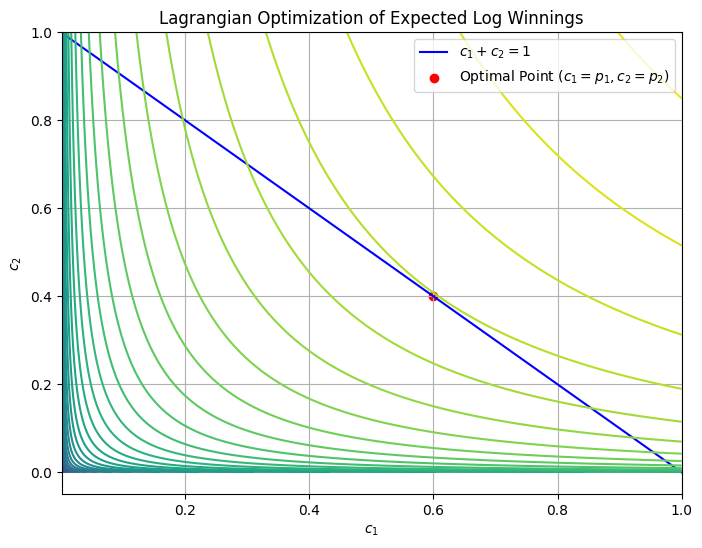

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# True probabilities
p1, p2 = 0.6, 0.4
# Odds (assume q1 and q2 are fixed, e.g., equal to true probabilities for simplicity)
q1, q2 = 0.3, 0.7


# Generate grid for c1 and c2
c1_vals = np.linspace(0.001, 1, 1000)
c2_vals = 1 - c1_vals  # since c1 + c2 = 1

# Calculate expected log winnings for each (c1, c2) pair
winnings = np.array([expected_log_winnings(c1, c2) for c1, c2 in zip(c1_vals, c2_vals)])

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(c1_vals, c2_vals, label='$c_1 + c_2 = 1$', color='blue')  # constraint line
plt.scatter(p1, p2, color='red', label='Optimal Point $(c_1 = p_1, c_2 = p_2)$')  # optimal point

# Contour plot of expected log winnings
c1_grid, c2_grid = np.meshgrid(np.linspace(0.001, 1, 1000), np.linspace(0.001, 1, 1000))
winnings_grid = expected_log_winnings(c1_grid, c2_grid)
plt.contour(c1_grid, c2_grid, winnings_grid, levels=40, cmap='viridis')

# Labels and legend
plt.xlabel('$c_1$')
plt.ylabel('$c_2$')
plt.title('Lagrangian Optimization of Expected Log Winnings')
plt.legend()
plt.grid()
plt.show()
